In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"

import matplotlib.pyplot as plt
import numpy as np
from importlib import reload

import bemcs

# Two-element model geometry
- Three points, $\mathrm{a}$, $\mathrm{b}$, and $\mathrm{c}$
- Two elements $\mathrm{ab}$ and $\mathrm{bc}$

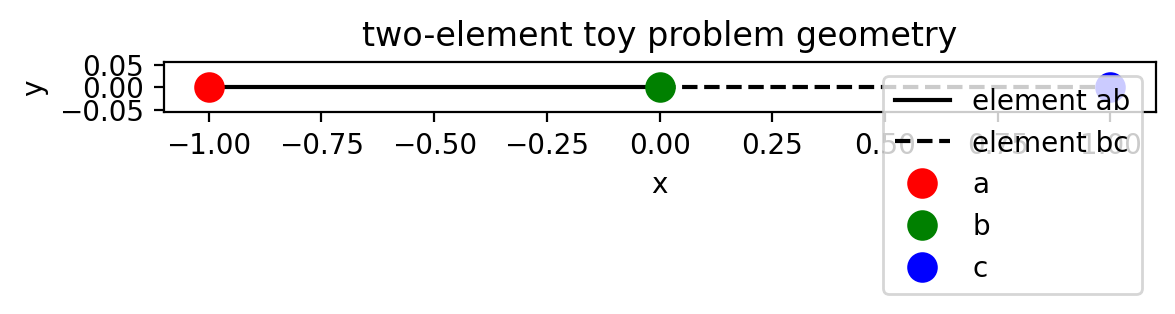

In [2]:
markersize = 20
plt.figure()
plt.plot([-1, 0], [0, 0], "-k", label="element ab")
plt.plot([0, 1], [0, 0], "--k", label="element bc")
plt.plot(-1, 0, "r.", label="a", markersize=markersize)
plt.plot(0, 0, "g.", label="b", markersize=markersize)
plt.plot(1, 0, "b.", label="c", markersize=markersize)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.gca().set_aspect("equal")
plt.title("two-element toy problem geometry")
plt.show()

# Constructing continous quadratic slip across two elements
The goal is for both slip, and it's derivative, to be continuous everhwere including, critcally, at points $\mathrm{b}$ the junction between elements $\mathrm{ab}$ and $\mathrm{bc}$ 

## Basic slip functions over each element
For the element $\mathrm{ab}$ the element slip is defined by,

$
\begin{equation}
    y_\mathrm{ab}(x) = \sum_{i=1}^3 \phi_{\mathrm{ab}, i} f_{\mathrm{ab}, i}(x)
\end{equation}
$

where $\phi_{\mathrm{ab}, i}$ are the quadratic weights and  $f_{\mathrm{ab}, i}(x)$ are the quadratic slip functions given by.  The slip gradients are similarly given by,

$
\begin{equation}
    \frac{dy_\mathrm{ab}(x)}{dx} = \sum_{i=1}^3 \phi_{\mathrm{ab}, i} \frac{df_{\mathrm{ab}, i}(x)}{dx}
\end{equation}
$

The slip functions are individually quadratic and assume a local coordinate system, $x'$,  such that the effective center of each element is at zero.  For the element $\mathrm{ab}$ the individual functions are,

$f_{\mathrm{ab}, 1}(x') = \frac{x'}{a} (\frac{9x'}{8a} - \frac{3}{4})$

$f_{\mathrm{ab}, 2}(x') = (1 - \frac{3x'}{2a})  (1 + \frac{3x'}{2a})$

$f_{\mathrm{ab}, 3}(x') = \frac{x'}{a} (\frac{9x'}{8a} + \frac{3}{4})$

where $a$ is the half width of an individual element $\mathrm{ab}$.  We'll also need the derivatives and those are given by,

$\frac{df_{\mathrm{ab}, 1}(x')}{dx'} = \frac{9x'}{4a^2} - \frac{3}{4a}$

$\frac{df_{\mathrm{ab}, 2}(x')}{dx'} = -\frac{9x'}{2a^2}$

$\frac{df_{\mathrm{ab}, 3}(x')}{dx'} = \frac{9x'}{4a^2} + \frac{3}{4a}$

Similarly, the functions are identical for element $\mathrm{bc}$.

## Boundary conditions
We have six boundary conditions:

1. $y_\mathrm{ab}(x_\mathrm{a}) = u_\mathrm{a}$, slip at point $\mathrm{a}$

2. $y_\mathrm{bc}(x_\mathrm{c}) = u_\mathrm{c}$, slip at point $\mathrm{c}$

3. $\frac{dy_\mathrm{ab}(x_\mathrm{a})}{dx} = \frac{du_\mathrm{a}}{dx}$, slip gradient at point $\mathrm{a}$

4. $\frac{dy_\mathrm{bc}(x_\mathrm{c})}{dx} = \frac{du_\mathrm{c}}{dx}$, slip gradient at point $\mathrm{c}$

5. $y_\mathrm{ab}(x_\mathrm{b}) = y_\mathrm{bc}(x_\mathrm{b})$, slip contintuity at point, $\mathrm{b}$.

6. $\frac{dy_\mathrm{ab}(x_\mathrm{b})}{dx} = \frac{dy_\mathrm{bc}(x_\mathrm{b})}{dx}$ continuity of slip gradient at point, $\mathrm{b}$.

## Building the linear system
We now have six equations and six unknowns, ($\phi_{\mathrm{ab}, 1}$, $\phi_{\mathrm{ab}, 2}$, $\phi_{\mathrm{ab}, 3}$, $\phi_{\mathrm{bc}, 1}$, $\phi_{\mathrm{bc}, 2}$, and $\phi_{\mathrm{bc}, 3}$).  The next step is to write this as linear system so that we can solve for the quadratic coefficients,
$
\begin{equation}
    \begin{bmatrix}
        u_\mathrm{a}\\
        u_\mathrm{c}\\
        \frac{d u_\mathrm{a}}{dx}\\
        \frac{d u_\mathrm{c}}{dx}\\
        0\\
        0
    \end{bmatrix}
    =
    \begin{bmatrix}
        f_{\mathrm{ab}, 1}(x_\mathrm{a}) & f_{\mathrm{ab}, 2}(x_\mathrm{a}) & f_{\mathrm{ab}, 3}(x_\mathrm{a}) & 0 & 0 & 0\\
        0 & 0 & 0 & f_{\mathrm{bc}, 1}(x_\mathrm{c}) & f_{\mathrm{bc}, 2}(x_\mathrm{c}) & f_{\mathrm{bc}, 3}(x_\mathrm{c})\\
        \frac{df_{\mathrm{ab}, 1}(x_\mathrm{a})}{dx} & \frac{df_{\mathrm{ab}, 2}(x_\mathrm{a})}{dx} & \frac{df_{\mathrm{ab}, 3}(x_\mathrm{a})}{dx} & 0 & 0 & 0\\
        0 & 0 & 0 & \frac{df_{\mathrm{bc}, 1}(x_\mathrm{c})}{dx} & \frac{df_{\mathrm{bc}, 2}(x_\mathrm{c})}{dx} & \frac{df_{\mathrm{bc}, 3}(x_\mathrm{c})}{dx}\\
        f_{\mathrm{ab}, 1}(x_\mathrm{b}) & f_{\mathrm{ab}, 2}(x_\mathrm{b}) & f_{\mathrm{ab}, 3}(x_\mathrm{b}) & -f_{\mathrm{bc}, 1}(x_\mathrm{b}) & -f_{\mathrm{bc}, 2}(x_\mathrm{b}) & -f_{\mathrm{bc}, 3}(x_\mathrm{b})\\
        \frac{df_{\mathrm{ab}, 1}(x_\mathrm{b})}{dx} & \frac{df_{\mathrm{ab}, 2}(x_\mathrm{b})}{dx} & \frac{df_{\mathrm{ab}, 3}(x_\mathrm{b})}{dx} & -\frac{df_{\mathrm{bc}, 1}(x_\mathrm{b})}{dx} & -\frac{df_{\mathrm{bc}, 2}(x_\mathrm{b})}{dx} & -\frac{df_{\mathrm{bc}, 3}(x_\mathrm{b})}{dx}
    \end{bmatrix}
    \begin{bmatrix}
        \phi_{\mathrm{ab}, 1}\\
        \phi_{\mathrm{ab}, 2}\\
        \phi_{\mathrm{ab}, 3}\\
        \phi_{\mathrm{bc}, 1}\\
        \phi_{\mathrm{bc}, 2}\\
        \phi_{\mathrm{bc}, 3}
   \end{bmatrix}
\end{equation}
$

With this linear system we can solve for all $\phi$ quadratic weights for the simple two element model (assuming that we're not rank degenerate).

## Important note
More needs to be done for the systems with more than two elements.  The reason for this is that each additional "internal" element that we add will only add two equations to the linear system (one for slip continuity and one for slip gradient continuity).  We need an additional constraint because each new element adds three quadratic weights that we need so solve for.  Possibilities for an additional constraint are:
- Mean slip over the element
- Slip at center of the element



# Define the functions we need to populate the linear operator
- Looks like a ton of redundancy (that can later be simplified) but I'm keeping this for now so that notation is consistent with the latex above

In [3]:
# Slip functions
def f_1(x, a):
    return (x / a) * (9 * (x / a) / 8 - 3 / 4)


def f_2(x, a):
    return (1 - 3 * (x / a) / 2) * (1 + 3 * (x / a) / 2)


def f_3(x, a):
    return (x / a) * (9 * (x / a) / 8 + 3 / 4)


# Slip gradient functions
def df_1_dx(x, a):
    return (9 * x) / (4 * a**2) - 3 / (4 * a)


def df_2_dx(x, a):
    return -(9 * x) / (2 * a**2)


def df_3_dx(x, a):
    return (9 * x) / (4 * a**2) + 3 / (4 * a)


# compute slip from 3qn coefficients
def get_slip(x, a, phi_1, phi_2, phi_3):
    return phi_1 * f_1(x, a) + phi_2 * f_2(x, a) + phi_3 * f_3(x, a)


# compute slipgradient from 3qn coefficients
def get_slipgradient(x, a, phi_1, phi_2, phi_3):
    return phi_1 * df_1_dx(x, a) + phi_2 * df_2_dx(x, a) + phi_3 * df_3_dx(x, a)

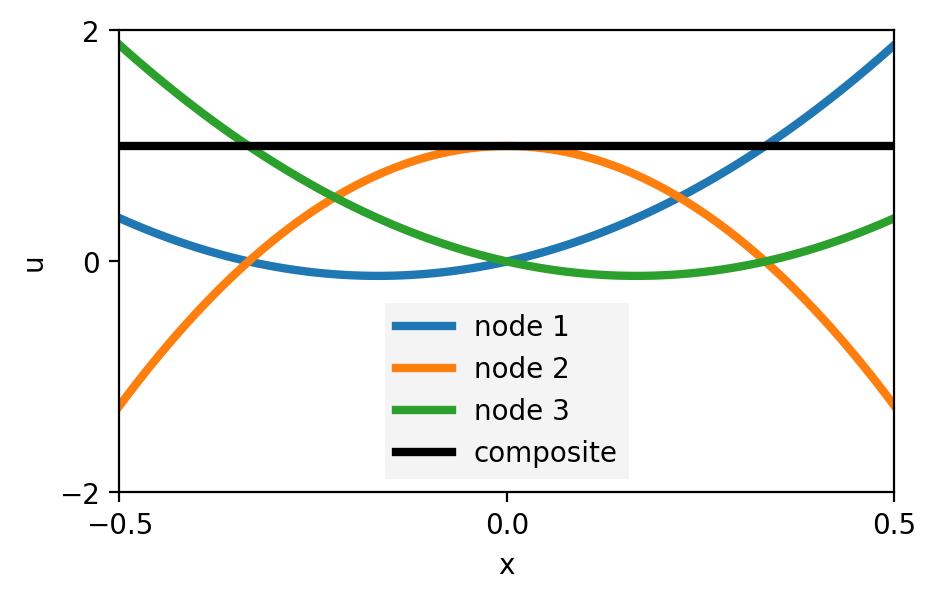

In [28]:
x = np.linspace(-0.5, 0.5, 100)

slip_3 = get_slip(x, 0.5, 1, 0, 0)
slip_2 = get_slip(x, 0.5, 0, 1, 0)
slip_1 = get_slip(x, 0.5, 0, 0, 1)

plt.figure(figsize=(5, 3))
plt.plot(x, slip_1, label="node 1", linewidth=3)
plt.plot(x, slip_2, label="node 2", linewidth=3)
plt.plot(x, slip_3, label="node 3", linewidth=3)
plt.plot(x, slip_1 + slip_2 + slip_3, "-k", label="composite", linewidth=3)
plt.xlabel("x")
plt.ylabel("u")
plt.xlim([-0.5, 0.5])
plt.xticks([-0.5, 0.0, 0.5])
plt.ylim([-2.0, 2.0])
plt.yticks([-2.0, 0.0, 2.0])
plt.legend(fancybox=False, edgecolor="none", facecolor=[0.95, 0.95, 0.95])
plt.savefig("single_element_node_profiles.pdf", bbox_inches="tight")
plt.show()

# Build the linear system

In [5]:
data_vector = np.zeros(6)
data_vector[0] = 0.0  # slip at a
data_vector[1] = 0.0  # slip at c
data_vector[2] = 1.0  # slip gradient at a
data_vector[3] = 0.0  # slip gradient at c

# data_vector[4] = 2.0  # sum of slip from ab and bc at b
# continuity and 1-differentiability of slip at a common node
data_vector[4] = 0.0  # set difference between s_ab(b) - s_bc(b) = 0
data_vector[5] = 0.0  # slip gradient at b is equal on both sides

linear_operator = np.zeros((6, 6))
x_a = -1.0
x_b = 0.0
x_c = 1.0
x_ab_centroid = 0.5 * (x_a + x_b)
x_bc_centroid = 0.5 * (x_b + x_c)
a = 0.5

# First row
linear_operator[0, 0] = f_1(x_a - x_ab_centroid, a)
linear_operator[0, 1] = f_2(x_a - x_ab_centroid, a)
linear_operator[0, 2] = f_3(x_a - x_ab_centroid, a)
linear_operator[0, 3] = 0
linear_operator[0, 4] = 0
linear_operator[0, 5] = 0

# Second row
linear_operator[1, 0] = 0
linear_operator[1, 1] = 0
linear_operator[1, 2] = 0
linear_operator[1, 3] = f_1(x_c - x_bc_centroid, a)
linear_operator[1, 4] = f_2(x_c - x_bc_centroid, a)
linear_operator[1, 5] = f_3(x_c - x_bc_centroid, a)

# Third row
linear_operator[2, 0] = df_1_dx(x_a - x_ab_centroid, a)
linear_operator[2, 1] = df_2_dx(x_a - x_ab_centroid, a)
linear_operator[2, 2] = df_3_dx(x_a - x_ab_centroid, a)
linear_operator[2, 3] = 0
linear_operator[2, 4] = 0
linear_operator[2, 5] = 0

# Fourth row
linear_operator[3, 0] = 0
linear_operator[3, 1] = 0
linear_operator[3, 2] = 0
linear_operator[3, 3] = df_1_dx(x_c - x_bc_centroid, a)
linear_operator[3, 4] = df_2_dx(x_c - x_bc_centroid, a)
linear_operator[3, 5] = df_3_dx(x_c - x_bc_centroid, a)

# Fifth row
linear_operator[4, 0] = f_1(x_b - x_ab_centroid, a)
linear_operator[4, 1] = f_2(x_b - x_ab_centroid, a)
linear_operator[4, 2] = f_3(x_b - x_ab_centroid, a)
linear_operator[4, 3] = -f_1(x_b - x_bc_centroid, a)
linear_operator[4, 4] = -f_2(x_b - x_bc_centroid, a)
linear_operator[4, 5] = -f_3(x_b - x_bc_centroid, a)

# Sixth row
linear_operator[5, 0] = df_1_dx(x_b - x_ab_centroid, a)
linear_operator[5, 1] = df_2_dx(x_b - x_ab_centroid, a)
linear_operator[5, 2] = df_3_dx(x_b - x_ab_centroid, a)
linear_operator[5, 3] = -df_1_dx(x_b - x_bc_centroid, a)
linear_operator[5, 4] = -df_2_dx(x_b - x_bc_centroid, a)
linear_operator[5, 5] = -df_3_dx(x_b - x_bc_centroid, a)

print(linear_operator)
print(f"{np.linalg.cond(linear_operator)=}")

print(" ")
linear_operator_rank = np.linalg.matrix_rank(linear_operator)
print(f"{linear_operator_rank=}")
if linear_operator_rank == 6:
    print("linear_operator is full rank")
elif linear_operator_rank < 6:
    print("LINEAR_OPERATOR IS NOT FULL RANK")
print(" ")

# Solve linear system for quadratic weights
quadratic_weights = np.linalg.inv(linear_operator) @ data_vector
# quadratic_weights = np.linalg.lstsq(linear_operator,data_vector)[0]
print(f"{quadratic_weights=}")

[[ 1.875 -1.25   0.375  0.     0.     0.   ]
 [ 0.     0.     0.     0.375 -1.25   1.875]
 [-6.     9.    -3.     0.     0.     0.   ]
 [ 0.     0.     0.     3.    -9.     6.   ]
 [ 0.375 -1.25   1.875 -1.875  1.25  -0.375]
 [ 3.    -9.     6.     6.    -9.     3.   ]]
np.linalg.cond(linear_operator)=35.399586123836556
 
linear_operator_rank=6
linear_operator is full rank
 
quadratic_weights=array([0.14583333, 0.3125    , 0.3125    , 0.17361111, 0.0625    ,
       0.00694444])


# Plot slip across elements ab and bc

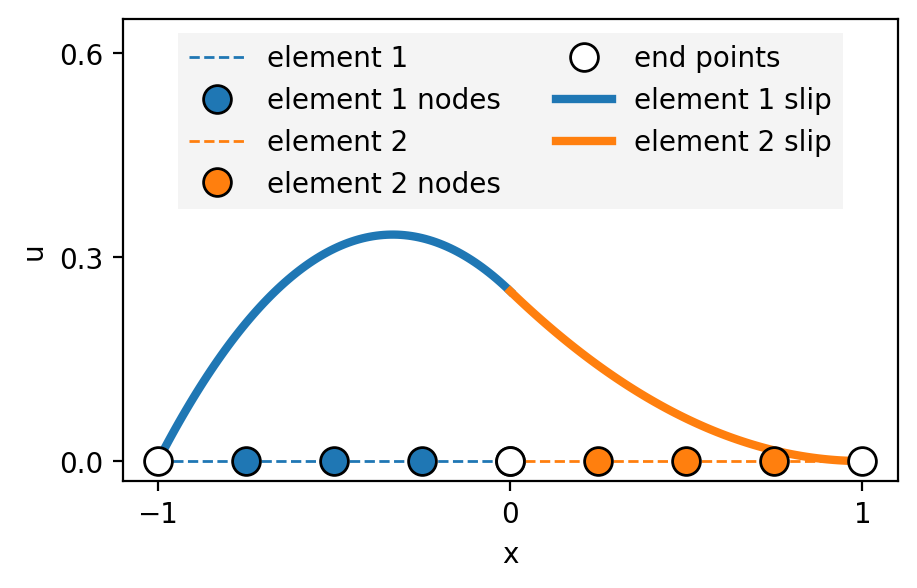

In [6]:
n_pts = 101
x_ab = np.linspace(x_a, x_b, n_pts)
x_bc = np.linspace(x_b, x_c, n_pts)

ab_slip = get_slip(
    x_ab - x_ab_centroid,
    a,
    quadratic_weights[0],
    quadratic_weights[1],
    quadratic_weights[2],
)
bc_slip = get_slip(
    x_bc - x_bc_centroid,
    a,
    quadratic_weights[3],
    quadratic_weights[4],
    quadratic_weights[5],
)

plt.figure(figsize=(5, 3))
markersize = 10
plt.plot([-1, 0], [0, 0], "--", linewidth=1, color="#1f77b4", label="element 1")
plt.plot(
    [-1, 0], [0, 0], "o", markersize=markersize, markeredgecolor="k", color="white"
)
plt.plot(
    [-0.75, -0.50, -0.25],
    [0, 0, 0],
    "o",
    linewidth=1,
    markeredgecolor="k",
    color="#1f77b4",
    markersize=markersize,
    label="element 1 nodes",
)
plt.plot([0, 1], [0, 0], "--", linewidth=1, color="#ff7f0e", label="element 2")
plt.plot(
    [0.25, 0.50, 0.75],
    [0, 0, 0],
    "o",
    linewidth=1,
    markeredgecolor="k",
    color="#ff7f0e",
    markersize=markersize,
    label="element 2 nodes",
)
plt.plot(
    [0, 1],
    [0, 0],
    "o",
    markersize=markersize,
    markeredgecolor="k",
    color="white",
    label="end points",
)
plt.plot(
    x_ab, ab_slip, "-", label="element 1 slip", linewidth=3, color="#1f77b4", zorder=0
)
plt.plot(
    x_bc, bc_slip, "-", label="element 2 slip", linewidth=3, color="#ff7f0e", zorder=0
)
plt.legend(
    loc="upper center",
    ncol=2,
    fancybox=False,
    edgecolor="none",
    facecolor=[0.95, 0.95, 0.95],
)
plt.xlabel("x")
plt.ylabel("u")
plt.ylim([-0.03, 0.65])
plt.xticks([-1, 0, 1])
plt.yticks([0.00, 0.3, 0.60])
plt.savefig("two_elements_continuous_slip.pdf", bbox_inches="tight")
plt.show()

## Compute stress change on the fault from the above slip distribution

/Users/meade/Desktop/bemcs/bemcs/bemcs.py:148: RuntimeWarning: divide by zero encountered in divide
  arctan_x_minus_a = np.pi / 2 * np.sign(y / (a - x)) - np.arctan(y / (a - x))
/Users/meade/Desktop/bemcs/bemcs/bemcs.py:149: RuntimeWarning: divide by zero encountered in divide
  arctan_x_plus_a = np.pi / 2 * np.sign(y / (a + x)) - np.arctan(y / (a + x))
/Users/meade/Desktop/bemcs/bemcs/bemcs.py:682: RuntimeWarning: divide by zero encountered in divide
  3
/Users/meade/Desktop/bemcs/bemcs/bemcs.py:760: RuntimeWarning: divide by zero encountered in divide
  1
/Users/meade/Desktop/bemcs/bemcs/bemcs.py:833: RuntimeWarning: divide by zero encountered in divide
  -3
/Users/meade/Desktop/bemcs/bemcs/bemcs.py:912: RuntimeWarning: divide by zero encountered in divide
  -3
/Users/meade/Desktop/bemcs/bemcs/bemcs.py:1003: RuntimeWarning: divide by zero encountered in divide
  1
/Users/meade/Desktop/bemcs/bemcs/bemcs.py:1087: RuntimeWarning: divide by zero encountered in divide
  -3
/Users/meade/D

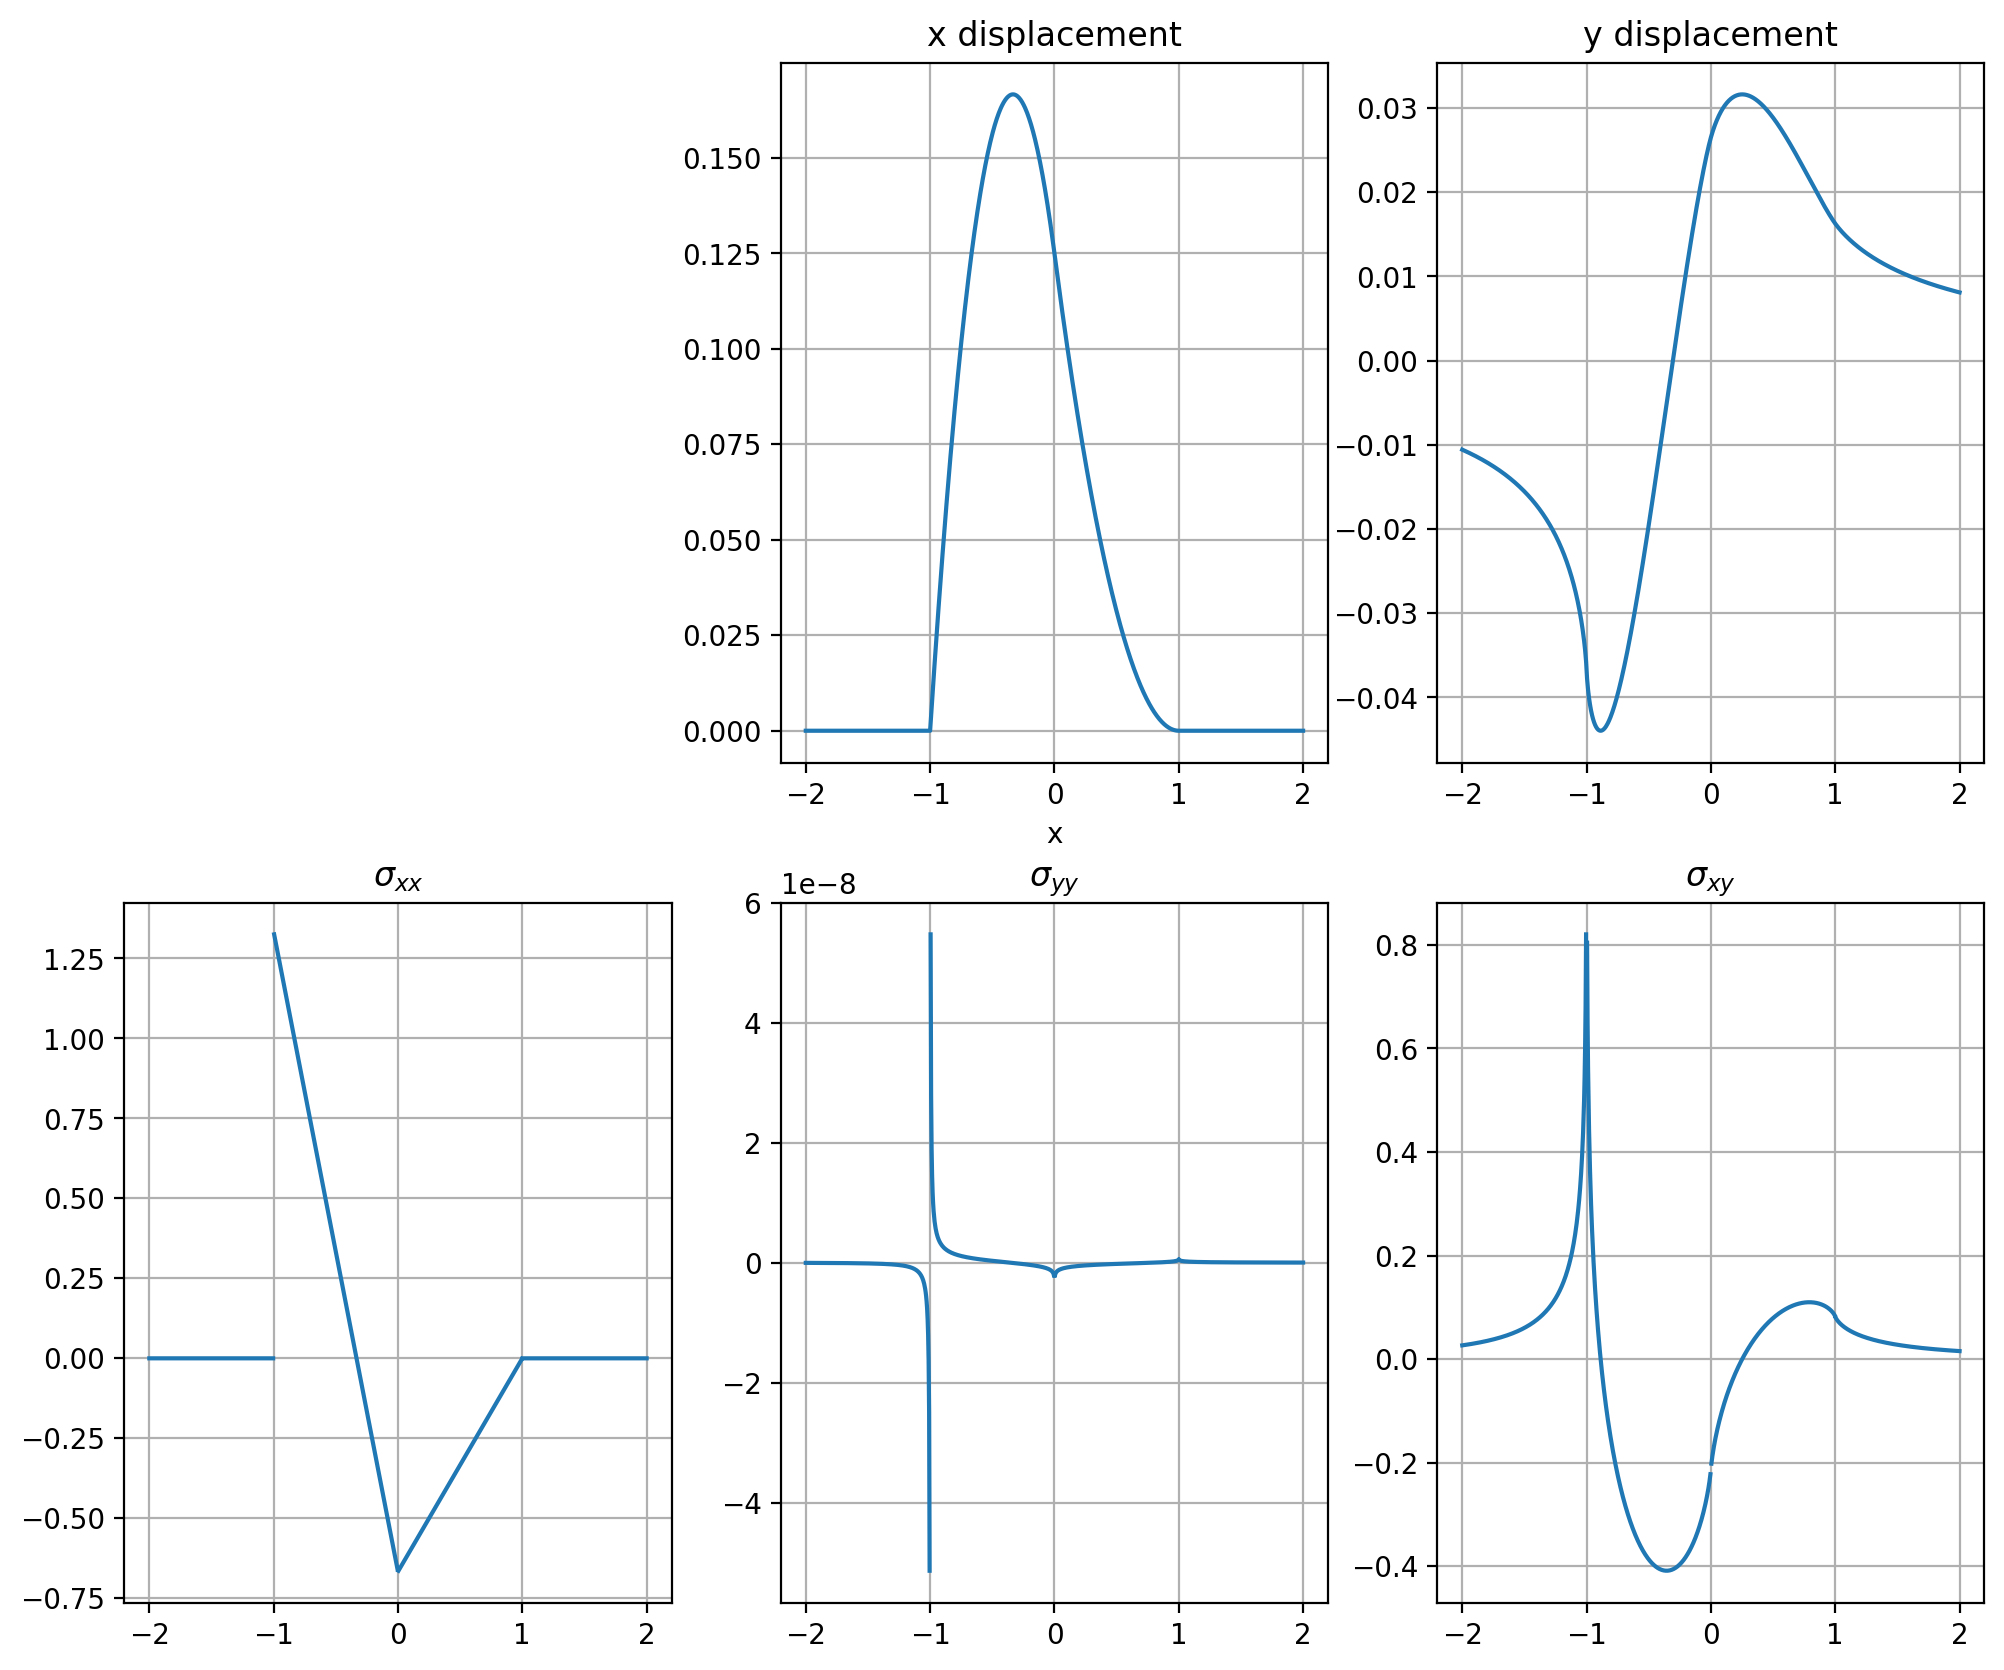

In [7]:
# observation points exactly on the fault
# x_obs = np.concatenate((x_ab,x_bc))
# Elastic parameters
mu_shear = 1
nu = 0.25

x_obs = np.linspace(-2.0, 2.0, 1001)
y_obs = 1e-9 * np.ones_like(x_obs)
displacement_total = np.zeros((2, len(x_obs)))
stress_total = np.zeros((3, len(x_obs)))

# for patch ab
displacement_eval, stress_eval = bemcs.displacements_stresses_quadratic_no_rotation(
    x_obs,
    y_obs,
    a,
    mu_shear,
    nu,
    quadratic_weights[0:3],
    [0.0, 0.0, 0.0],
    x_ab_centroid,
    0,
)
displacement_total += displacement_eval
stress_total += stress_eval

# for patch bc
displacement_eval, stress_eval = bemcs.displacements_stresses_quadratic_no_rotation(
    x_obs,
    y_obs,
    a,
    mu_shear,
    nu,
    quadratic_weights[3:],
    [0.0, 0.0, 0.0],
    x_bc_centroid,
    0,
)
displacement_total += displacement_eval
stress_total += stress_eval

# plot results
plt.figure(figsize=(12, 10))

plt.subplot(2, 3, 2)
plt.plot(x_obs, displacement_total[0, :])
plt.grid()
plt.xlabel("x")
plt.title("x displacement")

plt.subplot(2, 3, 3)
plt.plot(x_obs, displacement_total[1, :])
plt.grid()
plt.title("y displacement")

plt.subplot(2, 3, 4)
plt.plot(x_obs, stress_total[0, :])
plt.grid()
plt.title("$\sigma_{xx}$")

plt.subplot(2, 3, 5)
plt.plot(x_obs, stress_total[1, :])
plt.grid()
plt.title("$\sigma_{yy}$")

plt.subplot(2, 3, 6)
plt.plot(x_obs, stress_total[2, :])
plt.grid()
plt.title("$\sigma_{xy}$")
plt.show()